1. Yearly Trend for Number of Vehicles

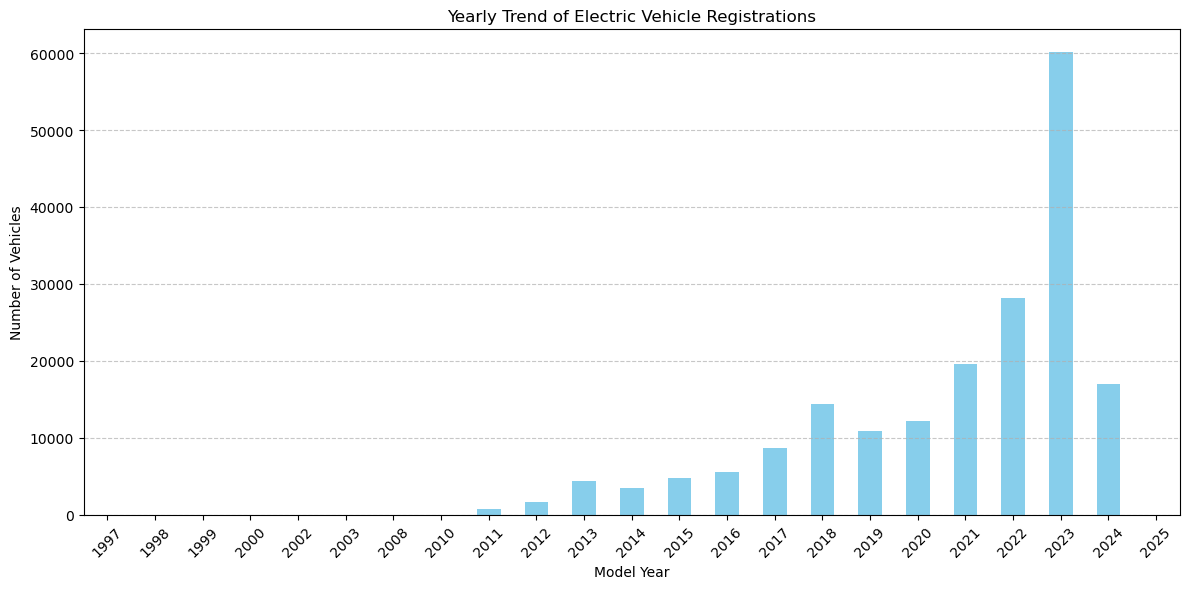

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Yearly trend
yearly_counts = df['Model Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Yearly Trend of Electric Vehicle Registrations')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2. Top 10 Companies with Maximum Number of Vehicles

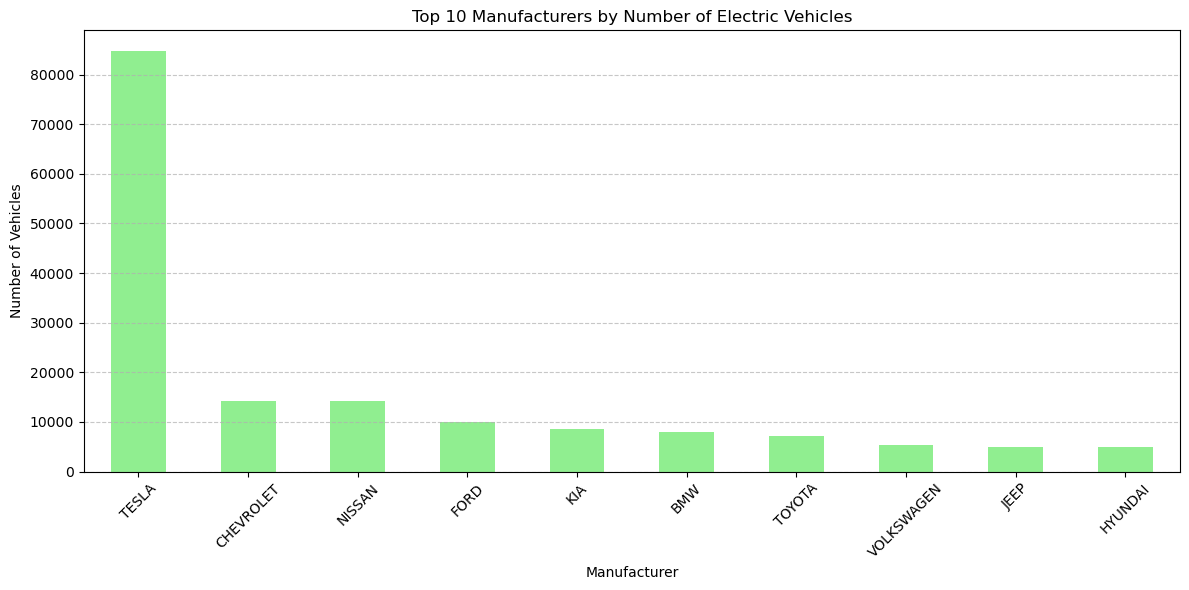

In [2]:
# Top 10 manufacturers
top_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_makes.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Manufacturers by Number of Electric Vehicles')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Relationship Between Number of Vehicles and Average Electric Range

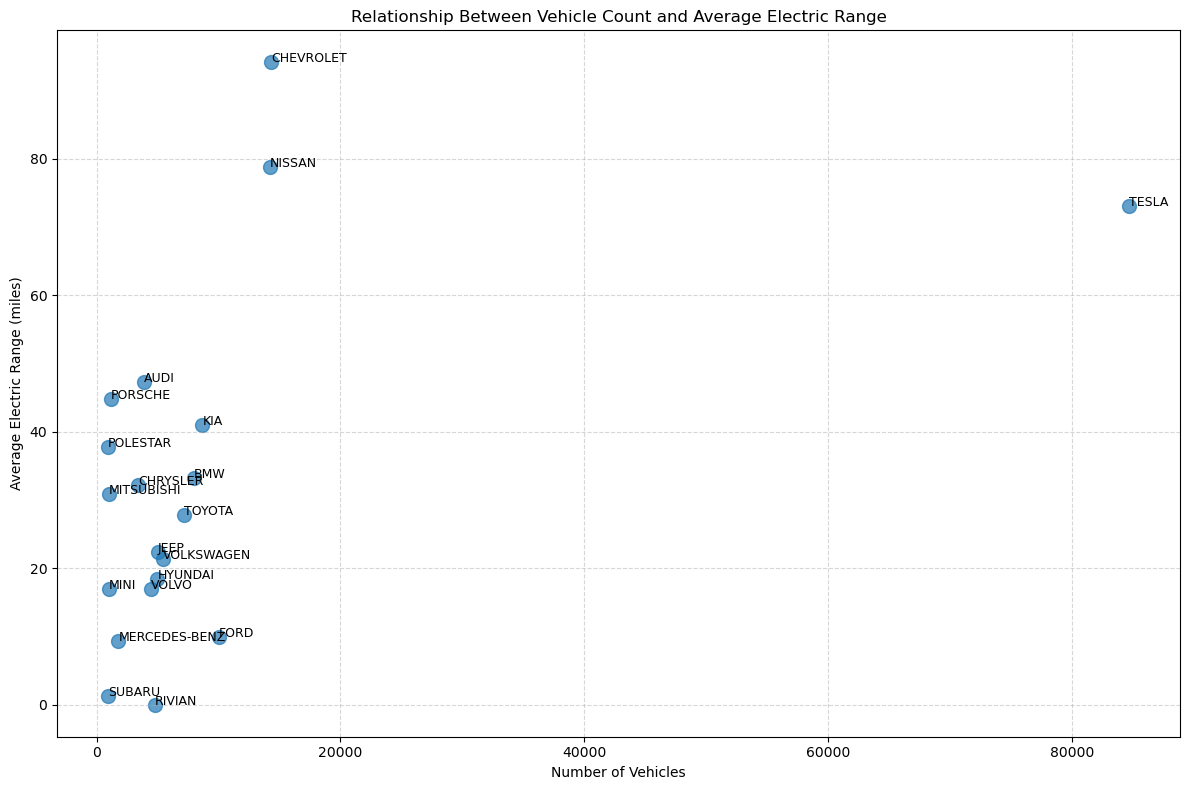

In [3]:
# Relationship between vehicle count and average electric range
make_stats = df.groupby('Make').agg(
    Count=('Make', 'size'),
    Avg_Range=('Electric Range', 'mean')
).sort_values('Count', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.scatter(make_stats['Count'], make_stats['Avg_Range'], s=100, alpha=0.7)
plt.title('Relationship Between Vehicle Count and Average Electric Range')
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate some points
for i, row in make_stats.iterrows():
    if row['Count'] > 50 or row['Avg_Range'] > 200:
        plt.text(row['Count'], row['Avg_Range'], i, fontsize=9)

plt.tight_layout()
plt.show()

4. Trend of Average Electric Range Yearly

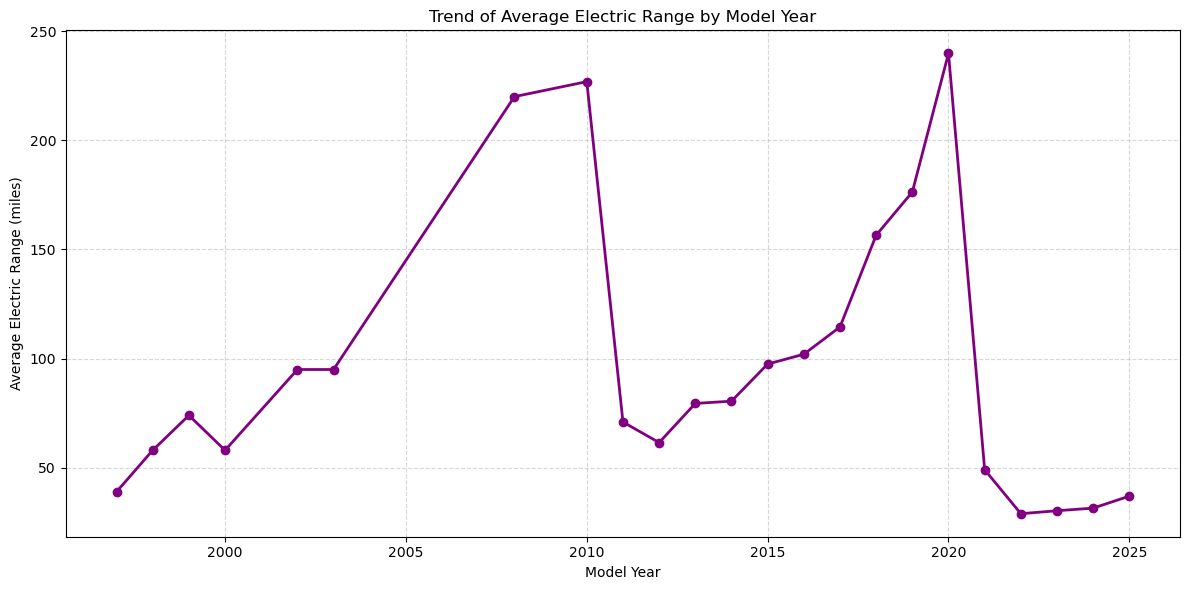

In [4]:
# Filter out years with very few data points and PHEVs with 0 range
range_trend = df[df['Electric Range'] > 0].groupby('Model Year')['Electric Range'].mean()

plt.figure(figsize=(12, 6))
range_trend.plot(kind='line', marker='o', color='purple', linewidth=2)
plt.title('Trend of Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

5. Comparison of Average Electric Range by Vehicle Type

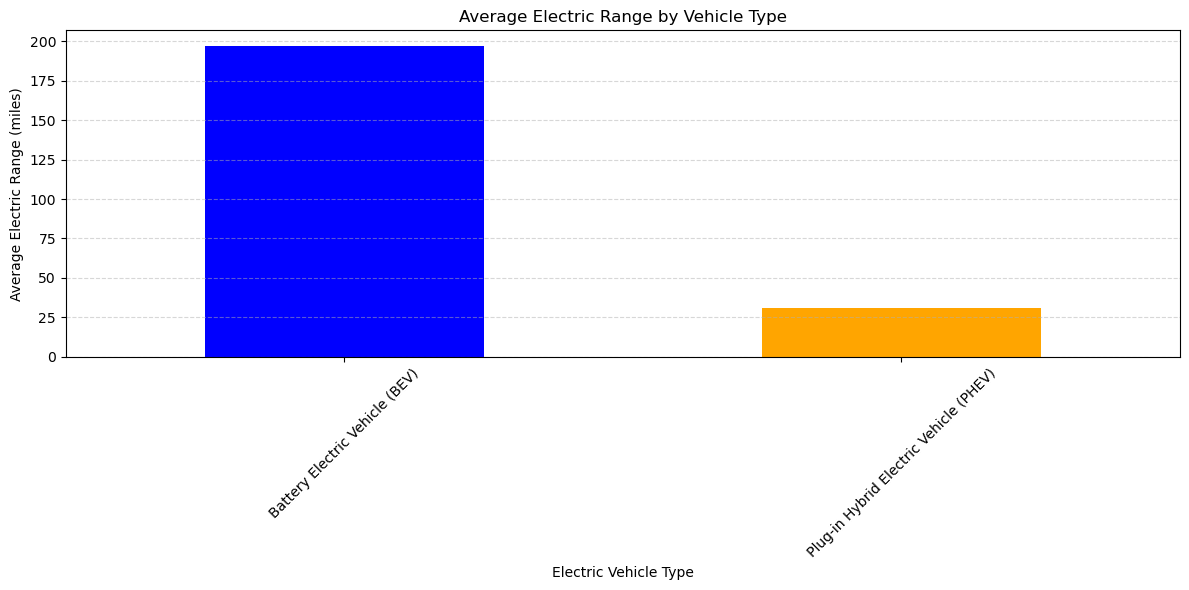

In [5]:
# Compare electric ranges by vehicle type
ev_types = df[df['Electric Range'] > 0].groupby('Electric Vehicle Type')['Electric Range'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ev_types.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Average Electric Range by Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()